# Phase 1

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report


import warnings
warnings.filterwarnings("ignore")

In [2]:
#https://www.kaggle.com/datasets/gokulrajkmv/indian-statewise-data-from-rbi?resource=download


The data set contains income , literacy rate of 2001 to 2011, Population of 2001 & 2011, sex ratio, uncomployement, poverty.

In [4]:
df.shape

(32, 14)

Population of each states, literacy rate of each state & Area are downloaded in one sheet

In [3]:
df1=pd.read_excel('Desktop/Population of India.xlsx')
df1

,Sr.No.,State,Population 2001,Population 2011,Increase,Literacy rate 2001,Literacy rate 2011,Area(Km2)
0,1,Uttar Pradesh,166052859,199812341,0.2023,57.36,67.68,240928
1,2,Maharashtra,96752247,112374333,0.1599,77.27,82.34,307713
2,3,Bihar,82878796,104099452,0.2542,47.53,61.80,94163
3,4,West Bengal,80221171,91276115,0.1384,69.22,76.26,88752
4,5,Andhra Pradesh,75727541,84580777,0.1098,61.11,67.02,275045
5,6,Madhya Pradesh,60385118,72626809,0.2035,64.11,69.32,308252
6,7,Tamil Nadu,62110839,72147030,0.1561,73.47,80.09,130060
7,8,Rajasthan,56473122,68548437,0.2131,61.03,66.11,342239
8,9,Karnataka,52733958,61095297,0.1560,67.04,75.36,191791
9,10,Gujarat,50596992,60439692,0.1928,69.97,78.03,196244


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sr.No.              35 non-null     int64  
 1   State               35 non-null     object 
 2   Population 2001     35 non-null     int64  
 3   Population 2011     35 non-null     int64  
 4   Increase            35 non-null     float64
 5   Literacy rate 2001  35 non-null     object 
 6   Literacy rate 2011  35 non-null     float64
 7   Area(Km2)           35 non-null     int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 2.3+ KB


In [67]:
df1['Literacy rate 2001']=df1['Literacy rate 2001'].astype(float)

In [68]:
df1['Literacy rate 2001'].dtype

dtype('float64')

<AxesSubplot:xlabel='Literacy rate 2001', ylabel='State'>

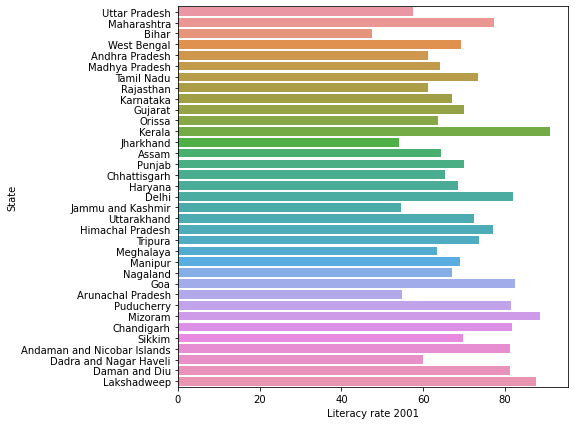

In [75]:
#Ploting the statewise literacy rate 2001

plt.figure(figsize=(7,7))
sns.barplot(y=df1['State'], x=df1['Literacy rate 2001'])

<AxesSubplot:xlabel='Literacy rate 2011', ylabel='State'>

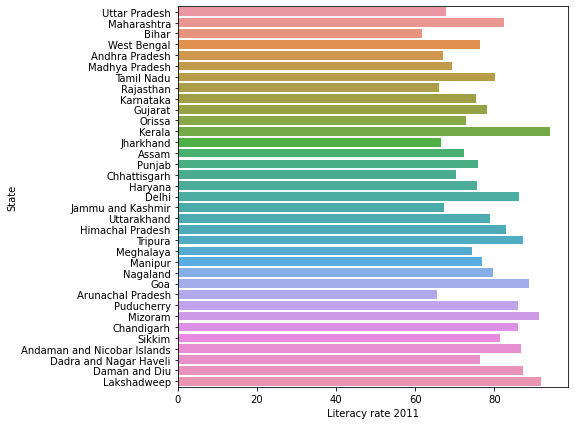

In [76]:
#Ploting the statewise literacy rate 2011

plt.figure(figsize=(7,7))
sns.barplot(y=df1['State'], x=df1['Literacy rate 2011'])

<AxesSubplot:xlabel='Area(Km2)', ylabel='State'>

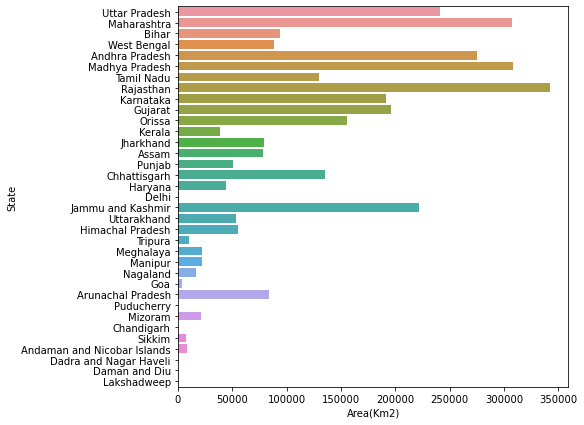

In [95]:
#Ploting the statewise Area

plt.figure(figsize=(7,7))
sns.barplot(y=df1['State'], x=df1['Area(Km2)'])

# Phase 1 completed

# Phase 2

# 2.1	Analysis of Literacy rate vs Total crimes.

In [5]:
Total_crimes=pd.read_csv("Downloads/01_District_wise_crimes_committed_IPC_2001_2012.csv")
Total_crimes.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [6]:
Total_crimes.groupby('YEAR')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)

YEAR
2012    4774376
2011    4651150
2010    4449662
2009    4242690
2008    4186758
2007    3979346
2006    3756586
2004    3664020
2005    3645204
2002    3560660
2001    3538616
2003    3432240
Name: TOTAL IPC CRIMES, dtype: int64

<AxesSubplot:xlabel='Literacy rate 2001', ylabel='TOTAL IPC CRIMES'>

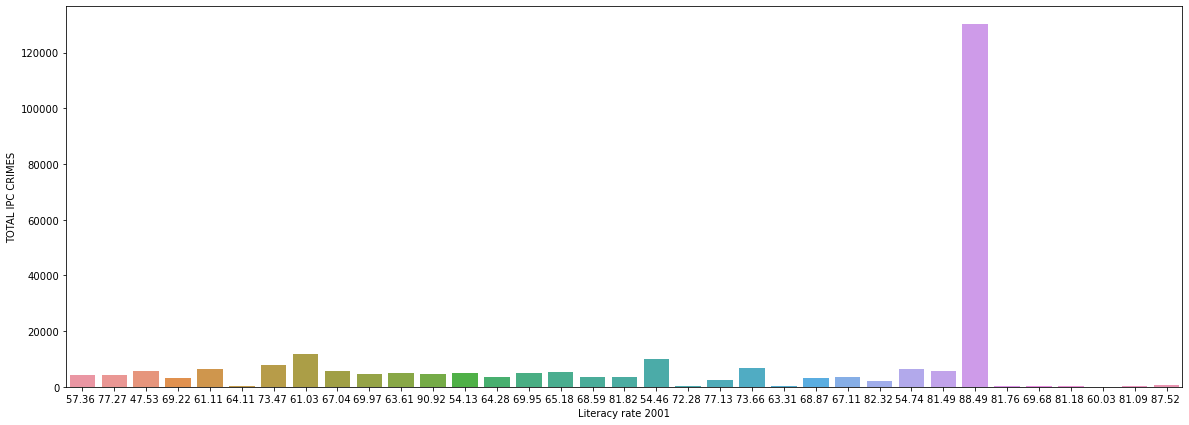

In [7]:
plt.figure(figsize=(20,7))
sns.barplot(x=df1['Literacy rate 2001'], y=Total_crimes['TOTAL IPC CRIMES'])

<AxesSubplot:xlabel='Literacy rate 2001', ylabel='MURDER'>

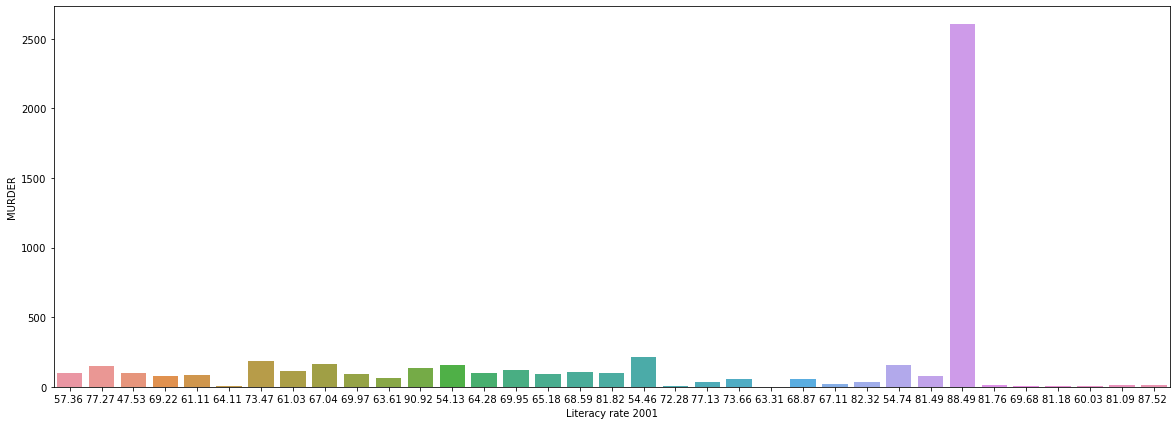

In [50]:
plt.figure(figsize=(20,7))
sns.barplot(x=df1['Literacy rate 2001'], y=Total_crimes['MURDER'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, '57.36\xa0'),
  Text(1, 0, '77.27\xa0'),
  Text(2, 0, '47.53\xa0'),
  Text(3, 0, '69.22\xa0'),
  Text(4, 0, '61.11\xa0'),
  Text(5, 0, '64.11\xa0'),
  Text(6, 0, '73.47\xa0'),
  Text(7, 0, '61.03\xa0'),
  Text(8, 0, '67.04\xa0'),
  Text(9, 0, '69.97\xa0'),
  Text(10, 0, '63.61\xa0'),
  Text(11, 0, '90.92\xa0'),
  Text(12, 0, '54.13\xa0'),
  Text(13, 0, '64.28\xa0'),
  Text(14, 0, '69.95\xa0'),
  Text(15, 0, '65.18\xa0'),
  Text(16, 0, '68.59\xa0'),
  Text(17, 0, '81.82\xa0'),
  Text(18, 0, '54.46\xa0'),
  Text(19, 0, '72.28\xa0'),
  Text(20, 0, '77.13\xa0'),
  Text(21, 0, '73.66\xa0'),
  Text(22, 0, '63.31\xa0'),
  Text(23, 0, '68.87\xa0'),
  Text(24, 0, '67.11\xa0'),
  Text(25, 0, '82.32\xa0'),
  Text(26, 0, '54.74\xa0'),
  Text(27, 0, '81.49\xa0'),
  Text(28, 0, '88.49\xa0'),
  Text(29, 0, '81.76\xa0'),
  Te

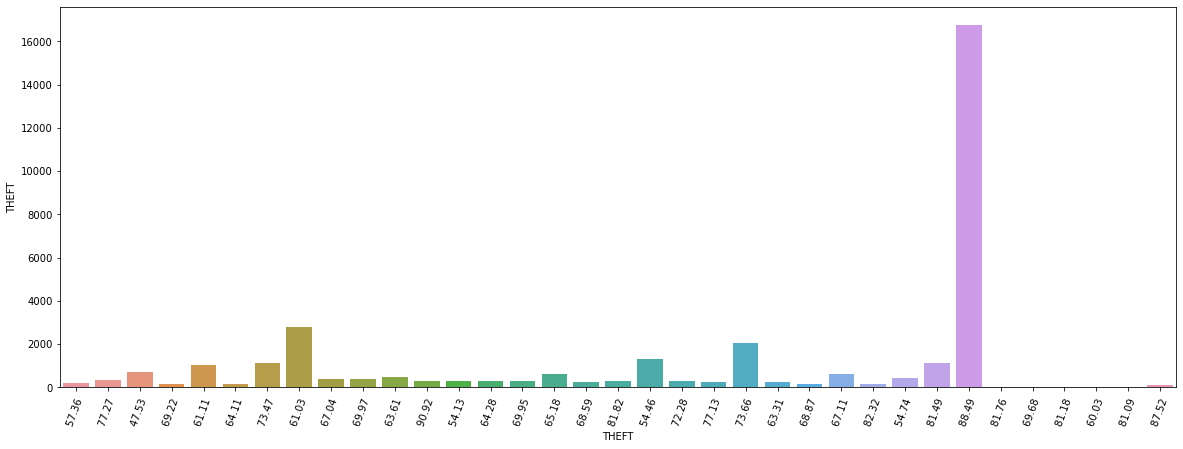

In [59]:
plt.figure(figsize=(20,7))
sns.barplot(x=df1['Literacy rate 2001'], y=Total_crimes['THEFT'],ci=None)
plt.xlabel('THEFT')
plt.xticks(rotation=70)

In [6]:

#In the year 2012 highest 4774376 nos. of cases are reported, followed by 2011, 2010.
#Very less nos. of cases has been reported in the year of 2003: - 3432240.

In [19]:
sorted=Total_crimes.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().sort_values(ascending=False)
sorted

STATE/UT
MADHYA PRADESH       4827540
MAHARASHTRA          4546872
TAMIL NADU           4120352
ANDHRA PRADESH       4037962
UTTAR PRADESH        3716148
RAJASTHAN            3711832
KARNATAKA            2962126
KERALA               2874918
GUJARAT              2771550
BIHAR                2692586
WEST BENGAL          2238608
ODISHA               1295892
DELHI UT             1266348
ASSAM                1195528
HARYANA              1190606
CHHATTISGARH         1122054
JHARKHAND             844702
PUNJAB                768262
JAMMU & KASHMIR       518310
HIMACHAL PRADESH      309896
UTTARAKHAND           206408
PUDUCHERRY            108232
TRIPURA               105468
CHANDIGARH             81614
MANIPUR                70144
GOA                    64102
ARUNACHAL PRADESH      55304
MIZORAM                52292
MEGHALAYA              50498
NAGALAND               26266
A & N ISLANDS          18204
SIKKIM                 14000
D & N HAVELI            9302
DAMAN & DIU             5896
LAKSH

#MADHYA PRADESH :-4827540, MAHARASHTRA :- 4546872, TAMIL NADU:- 4120352, ANDHRA PRADESH:- 4037962, UTTAR PRADESH:- 3716148 Theseare the top five states for highest crime cases repirted.

#A & N ISLANDS:- 18204, SIKKIM:- 14000, D & N HAVELI:- 9302, DAMAN & DIU:- 5896, LAKSHADWEEP:- 1486 these are the last five states where very less nos. of crime cases are reported.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'ANDHRA PRADESH'),
  Text(1, 0, 'ARUNACHAL PRADESH'),
  Text(2, 0, 'ASSAM'),
  Text(3, 0, 'BIHAR'),
  Text(4, 0, 'CHHATTISGARH'),
  Text(5, 0, 'GOA'),
  Text(6, 0, 'GUJARAT'),
  Text(7, 0, 'HARYANA'),
  Text(8, 0, 'HIMACHAL PRADESH'),
  Text(9, 0, 'JAMMU & KASHMIR'),
  Text(10, 0, 'JHARKHAND'),
  Text(11, 0, 'KARNATAKA'),
  Text(12, 0, 'KERALA'),
  Text(13, 0, 'MADHYA PRADESH'),
  Text(14, 0, 'MAHARASHTRA'),
  Text(15, 0, 'MANIPUR'),
  Text(16, 0, 'MEGHALAYA'),
  Text(17, 0, 'MIZORAM'),
  Text(18, 0, 'NAGALAND'),
  Text(19, 0, 'ODISHA'),
  Text(20, 0, 'PUNJAB'),
  Text(21, 0, 'RAJASTHAN'),
  Text(22, 0, 'SIKKIM'),
  Text(23, 0, 'TAMIL NADU'),
  Text(24, 0, 'TRIPURA'),
  Text(25, 0, 'UTTAR PRADESH'),
  Text(26, 0, 'UTTARAKHAND'),
  Text(27, 0, 'WEST BENGAL'),
  Text(28, 0, 'A & N ISLANDS'),
  Text(29, 0, 'CHAND

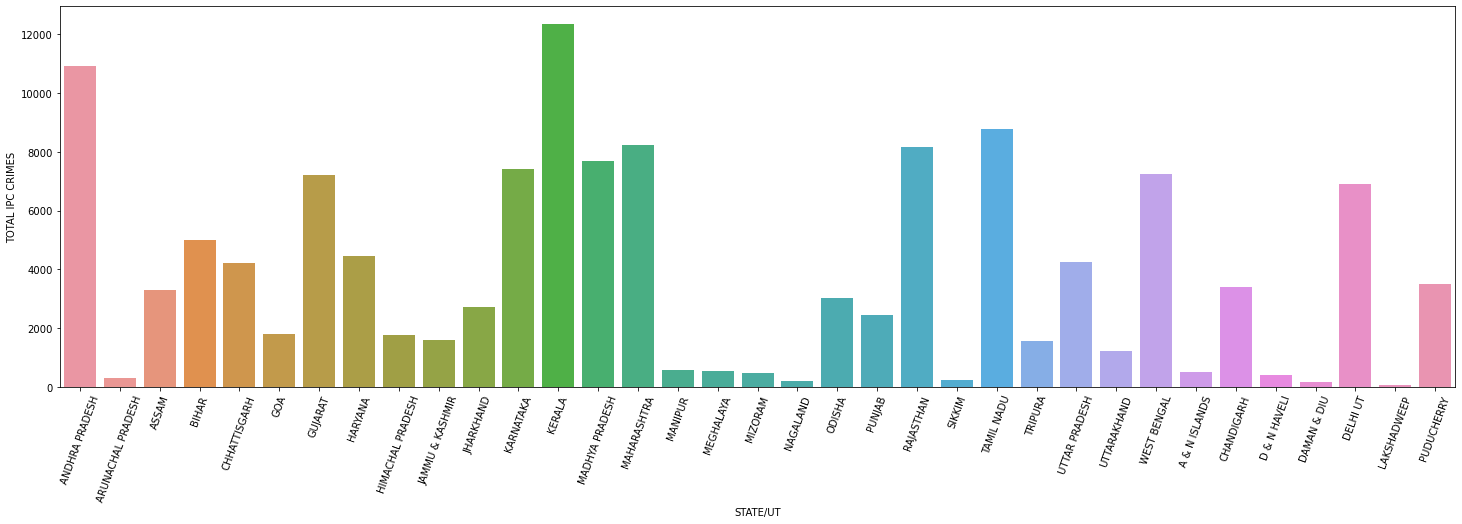

In [27]:
plt.figure(figsize=(25,7))
sns.barplot(x=Total_crimes['STATE/UT'], y=Total_crimes['TOTAL IPC CRIMES'], ci=None)
plt.xlabel('STATE/UT')
plt.xticks(rotation=70)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '2001'),
  Text(1, 0, '2002'),
  Text(2, 0, '2003'),
  Text(3, 0, '2004'),
  Text(4, 0, '2005'),
  Text(5, 0, '2006'),
  Text(6, 0, '2007'),
  Text(7, 0, '2008'),
  Text(8, 0, '2009'),
  Text(9, 0, '2010'),
  Text(10, 0, '2011'),
  Text(11, 0, '2012')])

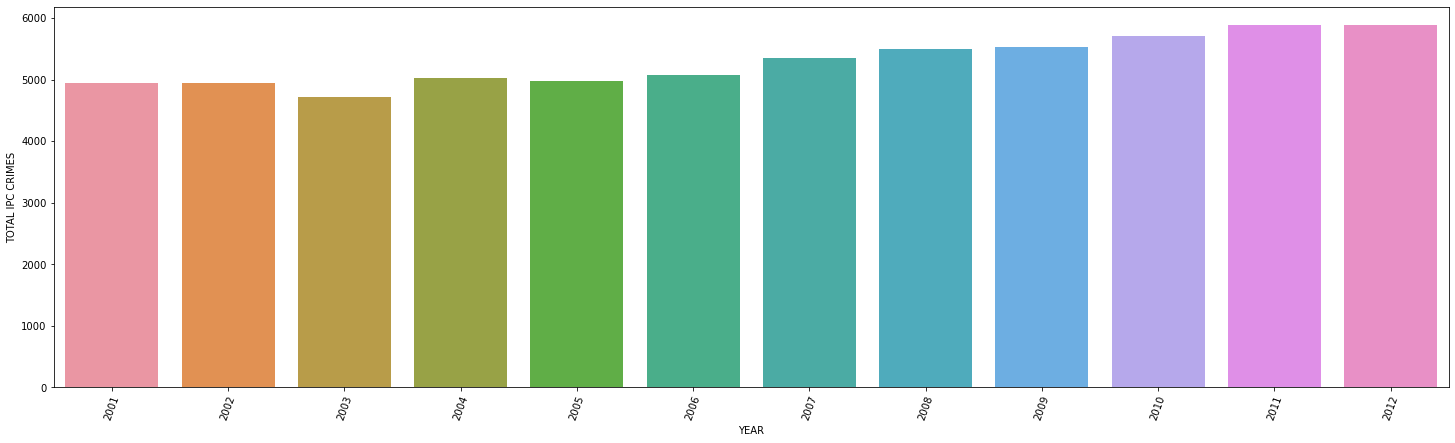

In [12]:
plt.figure(figsize=(25,7))
sns.barplot(x=Total_crimes['YEAR'],y=Total_crimes['TOTAL IPC CRIMES'], ci=None)
plt.xlabel('YEAR')
plt.xticks(rotation=70)

In [9]:
#Finding the total IPC crimes held from 2001 to 2012

Total_crimes['TOTAL IPC CRIMES'].sum()

47881308

Total 47881308 crimes held in india from 2001 to 2012

In [11]:
#Creating new variable

crimes=Total_crimes.select_dtypes(exclude='object')
crimes.drop('YEAR',axis=1, inplace=True)

crimes.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,101,60,17,50,0,50,46,30,16,9,...,30,1131,16,149,34,175,0,181,1518,4154
1,151,125,1,23,0,23,53,30,23,8,...,69,1543,7,118,24,154,0,270,754,4125
2,101,57,2,27,0,27,59,34,25,4,...,38,2088,14,112,83,186,0,404,1262,5818
3,80,53,1,20,0,20,25,20,5,1,...,23,795,17,126,38,57,0,233,1181,3140
4,82,67,1,23,0,23,49,26,23,4,...,41,1244,12,109,58,247,0,431,2313,6507


In [12]:
crimes.sum().sort_values(ascending=False)

TOTAL IPC CRIMES                                       47881308
OTHER IPC CRIMES                                       19605658
THEFT                                                   7001060
HURT/GREVIOUS HURT                                      6743752
OTHER THEFT                                             4460320
AUTO THEFT                                              2540740
BURGLARY                                                2234678
CAUSING DEATH BY NEGLIGENCE                             2003728
CRUELTY BY HUSBAND OR HIS RELATIVES                     1750402
RIOTS                                                   1549854
CHEATING                                                1535194
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY      906310
MURDER                                                   805086
KIDNAPPING & ABDUCTION                                   713714
ATTEMPT TO MURDER                                        703954
KIDNAPPING AND ABDUCTION OF WOMEN AND GI

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'ANDHRA PRADESH'),
  Text(1, 0, 'ARUNACHAL PRADESH'),
  Text(2, 0, 'ASSAM'),
  Text(3, 0, 'BIHAR'),
  Text(4, 0, 'CHHATTISGARH'),
  Text(5, 0, 'GOA'),
  Text(6, 0, 'GUJARAT'),
  Text(7, 0, 'HARYANA'),
  Text(8, 0, 'HIMACHAL PRADESH'),
  Text(9, 0, 'JAMMU & KASHMIR'),
  Text(10, 0, 'JHARKHAND'),
  Text(11, 0, 'KARNATAKA'),
  Text(12, 0, 'KERALA'),
  Text(13, 0, 'MADHYA PRADESH'),
  Text(14, 0, 'MAHARASHTRA'),
  Text(15, 0, 'MANIPUR'),
  Text(16, 0, 'MEGHALAYA'),
  Text(17, 0, 'MIZORAM'),
  Text(18, 0, 'NAGALAND'),
  Text(19, 0, 'ODISHA'),
  Text(20, 0, 'PUNJAB'),
  Text(21, 0, 'RAJASTHAN'),
  Text(22, 0, 'SIKKIM'),
  Text(23, 0, 'TAMIL NADU'),
  Text(24, 0, 'TRIPURA'),
  Text(25, 0, 'UTTAR PRADESH'),
  Text(26, 0, 'UTTARAKHAND'),
  Text(27, 0, 'WEST BENGAL'),
  Text(28, 0, 'A & N ISLANDS'),
  Text(29, 0, 'CHAND

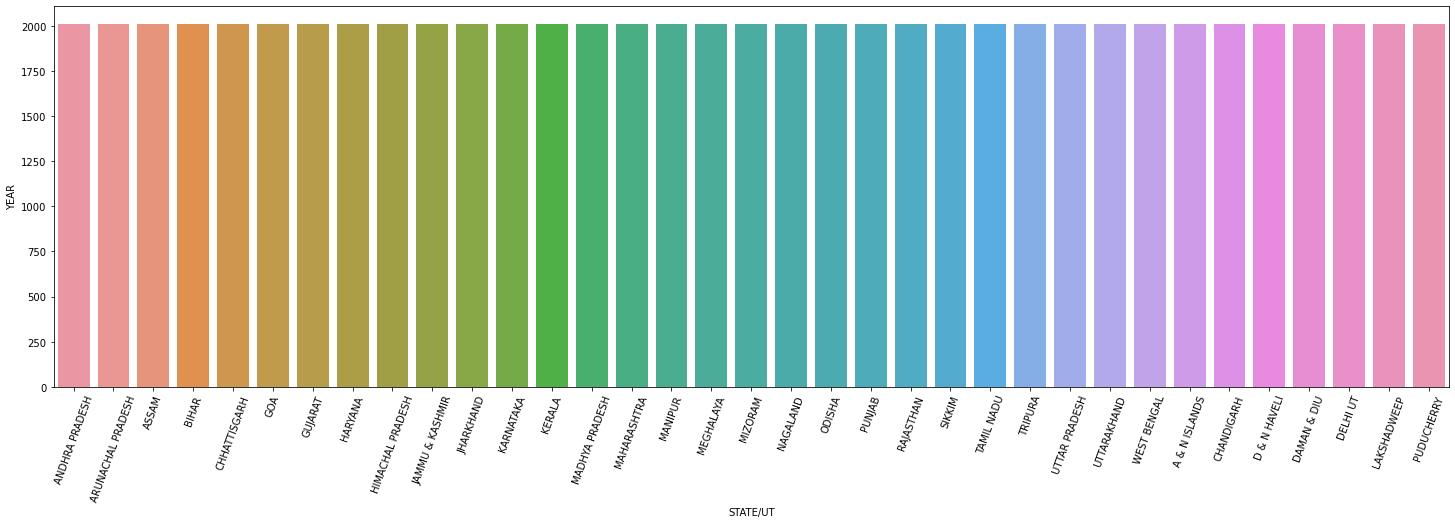

In [13]:
plt.figure(figsize=(25,7))
sns.barplot(x=Total_crimes['STATE/UT'],y=Total_crimes['YEAR'], ci=None)
plt.xlabel('STATE/UT')
plt.xticks(rotation=70)

In [14]:
Total_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [15]:
Total_crimes.groupby('YEAR')['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE','OTHER IPC CRIMES'].sum().T

YEAR,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
MURDER,72404,70580,65432,67216,65438,64962,64636,65532,64738,66670,68610,68868
ATTEMPT TO MURDER,63046,60760,51884,55780,56062,54460,54802,57196,58076,58842,62770,70276
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,6734,7248,8058,7870,7156,7070,7288,7726,7860,7564,7414,7240
RAPE,32150,32746,31694,36466,36718,38696,41474,42934,42794,44344,48412,49846
CUSTODIAL RAPE,0,6,2,4,14,4,2,0,4,12,2,2
OTHER RAPE,32150,32740,31692,36462,36704,38692,41472,42934,42790,44332,48410,49844
KIDNAPPING & ABDUCTION,44974,43700,39984,46654,45664,47982,55122,60522,67720,76880,89328,95184
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,29290,29012,26592,31156,31500,34828,40832,45878,51482,59590,71130,76524
KIDNAPPING AND ABDUCTION OF OTHERS,15684,14688,13392,15498,14164,13154,14290,14644,16238,17290,18198,18660
DACOITY,12308,12202,10606,10622,10282,9494,9158,9060,9172,8716,8570,8628


# 2.2	 Analysis of the type of crime vs each state vs Literacy rate.

In [17]:
Total_crimes.groupby('STATE/UT')['MURDER','ATTEMPT TO MURDER','CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','RAPE','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE','OTHER IPC CRIMES'].sum().T



STATE/UT,A & N ISLANDS,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM,BIHAR,CHANDIGARH,CHHATTISGARH,D & N HAVELI,DAMAN & DIU,DELHI UT,...,ODISHA,PUDUCHERRY,PUNJAB,RAJASTHAN,SIKKIM,TAMIL NADU,TRIPURA,UTTAR PRADESH,UTTARAKHAND,WEST BENGAL
MURDER,320,63512,1682,30864,82490,486,24120,216,136,12410,...,28906,714,18986,31688,332,40254,4044,130886,5896,42112
ATTEMPT TO MURDER,130,44840,834,11324,81838,602,15820,62,76,10554,...,31304,686,20794,42684,222,53194,1362,121040,5254,29386
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,42,3526,72,1436,7344,158,696,6,4,1766,...,1396,156,3116,1778,76,686,38,34532,1028,12666
RAPE,218,26958,1000,32356,26248,562,23676,112,40,12848,...,22860,154,10918,31596,390,13904,4116,38116,2756,41574
CUSTODIAL RAPE,0,4,0,10,4,0,0,0,0,0,...,0,0,2,0,0,4,0,4,0,0
OTHER RAPE,218,26954,1000,32346,26244,562,23676,112,40,12848,...,22860,154,10916,31596,390,13900,4116,38112,2756,41574
KIDNAPPING & ABDUCTION,188,42478,1714,55878,74440,1280,6690,282,62,50166,...,19458,338,15238,61454,152,30606,2886,118532,5704,51998
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,154,29872,1116,45840,38778,1068,5260,188,30,31300,...,16582,242,10770,49342,124,24872,1750,95180,4668,43546
KIDNAPPING AND ABDUCTION OF OTHERS,34,12606,598,10038,35662,212,1430,94,32,18866,...,2876,96,4468,12112,28,5734,1136,23352,1036,8452
DACOITY,30,3974,520,8340,22198,62,2936,80,68,762,...,6762,76,920,1126,12,2474,452,9618,714,5284


# 2.2	 Analysis of the type of crime vs each state vs Literacy rate.

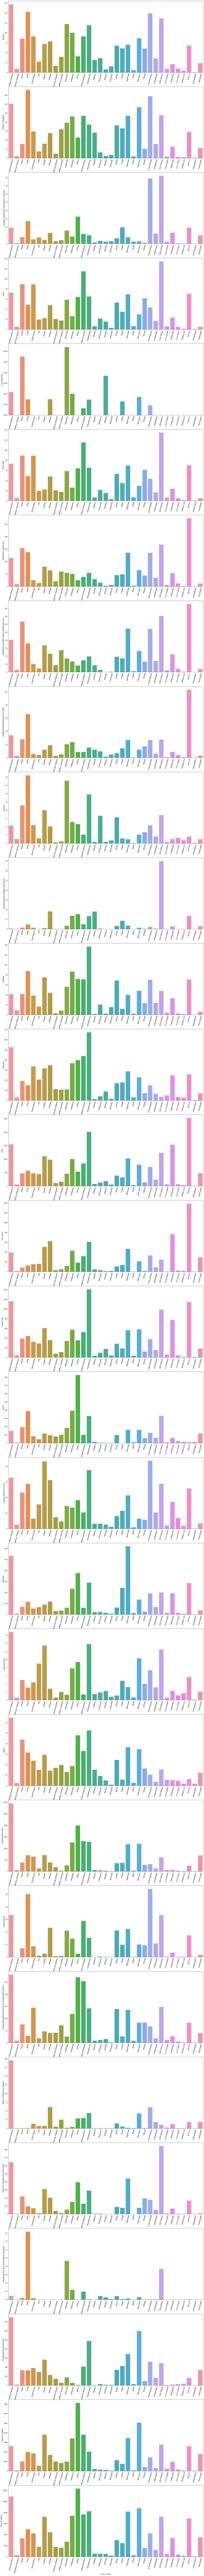

In [39]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(25,900))
plotnumber=1

for column in crimes:
    if plotnumber<=81:
        ax=plt.subplot(80,1, plotnumber)
        sns.barplot(y=crimes[column],x=Total_crimes['STATE/UT'],ci=None)
        plt.xlabel(column,fontsize=8)
        plt.xticks(rotation = 75)
    plotnumber+=1
    
plt.show()
#sns.barplot(x=crimes, y=Total_crimes['STATE/UT'])

# 2.3	Analysis of year-on-year total crime rate.

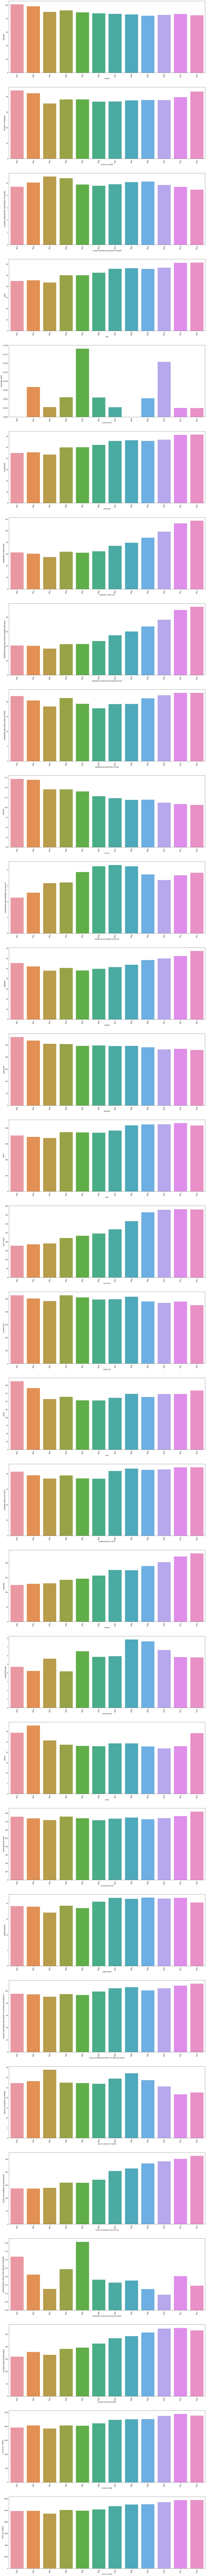

In [40]:
# Lets check data destribution, visualize the dataset

plt.figure(figsize=(25,900))
plotnumber=1

for column in crimes:
    if plotnumber<=81:
        ax=plt.subplot(80,1, plotnumber)
        sns.barplot(y=crimes[column],x=Total_crimes['YEAR'],ci=None)
        plt.xlabel(column,fontsize=8)
        plt.xticks(rotation = 75)
    plotnumber+=1
    
plt.show()
#sns.barplot(x=crimes, y=Total_crimes['STATE/UT'])

# 2.4	 Analysis of area vs overall crime

<Figure size 1224x504 with 0 Axes>

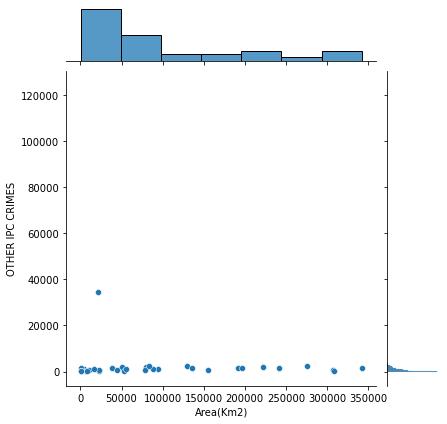

In [89]:
plt.figure(figsize=(17,7))
sns.jointplot(x=df1['Area(Km2)'],y=Total_crimes['OTHER IPC CRIMES'])


<Figure size 1224x1440 with 0 Axes>

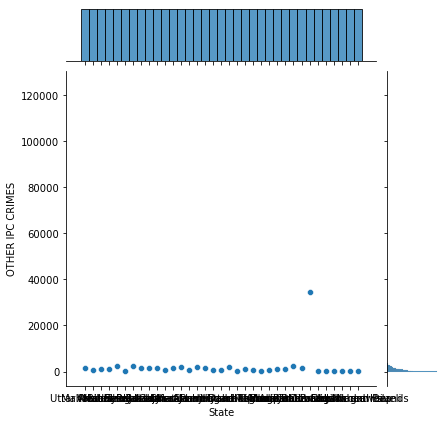

In [84]:
plt.figure(figsize=(17,20))
sns.jointplot(x=df1['State'],y=Total_crimes['OTHER IPC CRIMES'])